In [137]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import matplotlib.cm as cm
from matplotlib.patches import Patch
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.optimize import curve_fit
from scipy.special import erfc
from scipy.stats import norm
import importlib
import basicfunc as bbb

importlib.reload(bbb)

<module 'basicfunc' from 'c:\\Users\\Utente\\Desktop\\uni\\MAGISTRALE\\ESAMI\\laboratory1\\lab\\imaging\\basicfunc.py'>

In [138]:
D1 = uproot.open('data_imaging\\group23_22Na_D1_10min_definitivo\\RAW\\DataR_CH0@DT5720B_781_group23_22Na_D1_10min_definitivo.root')
D2 = uproot.open('data_imaging\\group23_22Na_D2_10min_definitivo_sicuri\\RAW\\DataR_CH1@DT5720B_781_group23_22Na_D2_10min_definitivo_sicuri.root')
D3 = uproot.open('data_imaging\\group23_22Na_D3_10min_def\\RAW\\DataR_CH2@DT5720B_781_group23_22Na_D3_10min_def.root')
D4 = uproot.open('data_imaging\\group23_22Na_D4_10min_def\\RAW\\DataR_CH3@DT5720B_781_group23_22Na_D4_10min_def.root')
D5 = uproot.open('data_imaging\\group23_22Na_D5_10min_def\\RAW\\DataR_CH0@DT5720B_467_group23_22Na_D5_10min_def.root')
D6 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH1@DT5720B_467_group23_22Na_D6_10min_def.root')
D7 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH2@DT5720B_467_group23_22Na_D6_10min_def.root')
D8 = uproot.open('data_imaging\\group23_22Na_D6_10min_def\\RAW\\DataR_CH3@DT5720B_467_group23_22Na_D6_10min_def.root')

In [139]:
d1 = np.asarray(D1['Data_R;1']['Energy'].array())
d2 = np.asarray(D2['Data_R;2']['Energy'].array())
d3 = np.asarray(D3['Data_R;2']['Energy'].array())
d4 = np.asarray(D4['Data_R;2']['Energy'].array())
d5 = np.asarray(D5['Data_R;3']['Energy'].array())
d6 = np.asarray(D6['Data_R;3']['Energy'].array())
d7 = np.asarray(D7['Data_R;2']['Energy'].array())
d8 = np.asarray(D8['Data_R;2']['Energy'].array())


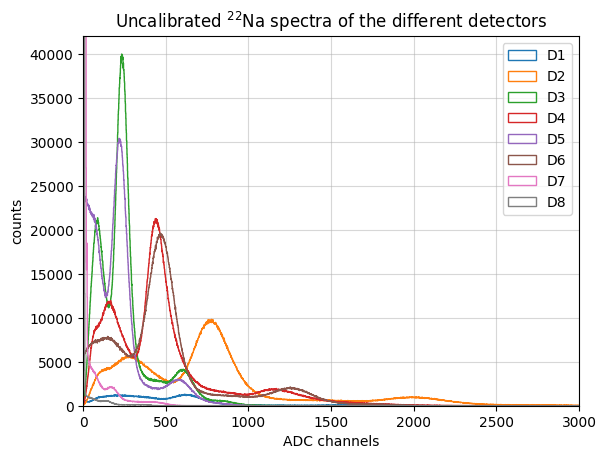

In [140]:
plt.hist(d1, bins=int(d1.max()), histtype='step', label='D1')
plt.hist(d2, bins=int(d2.max()), histtype='step', label='D2')
plt.hist(d3, bins=int(d3.max()), histtype='step', label='D3')
plt.hist(d4, bins=int(d4.max()), histtype='step', label='D4')
plt.hist(d5, bins=int(d5.max()), histtype='step', label='D5')
plt.hist(d6, bins=int(d6.max()), histtype='step', label='D6')
plt.hist(d7, bins=int(d7.max()), histtype='step', label='D7')
plt.hist(d8, bins=int(d8.max()), histtype='step', label='D8')
plt.title(r'Uncalibrated $^{22}$Na spectra of the different detectors')
plt.xlabel('ADC channels')
plt.ylabel('counts')
plt.ylim(0, 42000)
plt.xlim(0, 3000)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [141]:
print('D1 \nCompton')
# d1normCom = bbb.normal(d1, xlabel='ADC channels', ylabel='counts', titolo=r'Fit of the of $^{22}$Na', xmin=500, xmax=750, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Primo picco:')
d1norm1 = bbb.normal(d1, xmin=500, xmax=750, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco:')
d1norm2 = bbb.normal(d1, xmin=1400, xmax=2000, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D2 \nPrimo picco')
d2norm1 = bbb.normal(d2, xmin=600, xmax=950, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d2norm2 = bbb.normal(d2,  xmin=1750, xmax=2300, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D3 \nPrimo Picco')
d3norm1 = bbb.normal(d3, xmin=170, xmax=300, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d3norm2 = bbb.normal(d3, xmin=520, xmax=700, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D4 \nPrimo picco')
d4norm1 = bbb.normal(d4, xmin=320, xmax=570, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d4norm2 = bbb.normal(d4, xmin=1000, xmax=1350, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D5 \nPrimo picco')
d5norm1 = bbb.normal(d5, xmin=150, xmax=300, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d5norm2 = bbb.normal(d5, xmin=480, xmax=680, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D5 \nPrimo picco')
d6norm1 = bbb.normal(d6, xmin=350, xmax=580, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d6norm2 = bbb.normal(d6, xmin=1100, xmax=1450, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D5 \nPrimo picco')
d7norm1 = bbb.normal(d7, xmin=140, xmax=200, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d7norm2 = bbb.normal(d7, xmin=350, xmax=500, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('______________________________________________________________________________________________________________')
print('D5 \nPrimo picco')
d8norm1 = bbb.normal(d8, xmin=100, xmax=200, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')
print('Secondo picco')
d8norm2 = bbb.normal(d8, xmin=250, xmax=400, x1=0, x2=3000, b=int(d1.max()), n=2, plot='no')

D1 
Compton
Primo picco:
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 338109.3599060629 ± 1905.151088414951
Media = 616.0207899885756 ± 0.4835257283466749
Sigma = 110.79018891855962 ± 0.8060963475372384
Chi-quadro = 357.134863942679
Chi-quadro ridotto = 1.445890137419753
Integrale dell'istogramma nel range [394.44041215145637, 837.6011678256949] = 371889 ± 609
Secondo picco:
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 43765.79421203449 ± 299.57369506237745
Media = 1624.6067070564497 ± 1.2564103943678144
Sigma = 168.99294309209205 ± 1.4516617266924874
Chi-quadro = 662.171225457022
Chi-quadro ridotto = 1.1091645317538057
Integrale dell'istogramma nel range [1286.6208208722655, 1962.592593240634] = 44017 ± 209
______________________________________________________________________________________________________________
D2 
Primo picco
Parametri ottimizzati:
-----------------------------------------------
Ampiezza =

In [142]:
y_calib = np.array([511, 1275]) #KeV
#__________________________________________________________________________________________________________
xD1 = np.array([d1norm1[0][1], d1norm2[0][1]])
sxD1 = np.array([d1norm1[1][1], d1norm2[1][1],])
calibrazioneD1 = bbb.linear_regression(xD1, y_calib, sx=sxD1, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D1', plot='no')
print('__________________________________________________________________________________________________________')
xD2 = np.array([d2norm1[0][1], d2norm2[0][1]])
sxD2 = np.array([d2norm1[1][1], d2norm2[1][1],])
calibrazioneD2 = bbb.linear_regression(xD2, y_calib, sx=sxD2, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D2', plot='no')
print('__________________________________________________________________________________________________________')
xD3 = np.array([d3norm1[0][1], d3norm2[0][1]])
sxD3 = np.array([d3norm1[1][1], d3norm2[1][1],])
calibrazioneD3 = bbb.linear_regression(xD3, y_calib, sx=sxD3, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D3', plot='no')
print('__________________________________________________________________________________________________________')
xD4 = np.array([d4norm1[0][1], d4norm2[0][1]])
sxD4 = np.array([d4norm1[1][1], d4norm2[1][1],])
calibrazioneD4 = bbb.linear_regression(xD4, y_calib, sx=sxD4, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D4', plot='no')
print('__________________________________________________________________________________________________________')
xD5 = np.array([d5norm1[0][1], d5norm2[0][1]])
sxD5 = np.array([d5norm1[1][1], d5norm2[1][1],])
calibrazioneD5 = bbb.linear_regression(xD5, y_calib, sx=sxD5, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D5', plot='no')
print('__________________________________________________________________________________________________________')
xD6 = np.array([d6norm1[0][1], d6norm2[0][1]])
sxD6 = np.array([d6norm1[1][1], d6norm2[1][1],])
calibrazioneD6 = bbb.linear_regression(xD6, y_calib, sx=sxD6, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D6', plot='no')
print('__________________________________________________________________________________________________________')
xD7 = np.array([d7norm1[0][1], d7norm2[0][1]])
sxD7 = np.array([d7norm1[1][1], d7norm2[1][1],])
calibrazioneD7 = bbb.linear_regression(xD7, y_calib, sx=sxD7, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D7', plot='no')
print('__________________________________________________________________________________________________________')
xD8 = np.array([d8norm1[0][1], d8norm2[0][1]])
sxD8 = np.array([d8norm1[1][1], d8norm2[1][1],])
calibrazioneD8 = bbb.linear_regression(xD8, y_calib, sx=sxD8, sy = None, xlabel='ADC channels', ylabel='Energy [KeV]', titolo='Calibration fit D8', plot='no')


Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 0.7574962004433666 ± 0.0015822020251721697
Intercetta (q) = 44.36659218904066 ± 1.0350907569265246
Chi-squared= 1.5369234634999633e-18
Non ha senso calcolare il chi2 ridotto
__________________________________________________________________________________________________________
Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 0.631641346893913 ± 0.0003609030711236539
Intercetta (q) = 22.201632035585305 ± 0.28713120187355545
Chi-squared= 5.705489716034212e-17
Non ha senso calcolare il chi2 ridotto
__________________________________________________________________________________________________________
Parametri ottimizzati:
-----------------------------------------------
Inclinazione (m) = 2.121317450816527 ± 0.00027138444246053875
Intercetta (q) = 11.822421778864964 ± 0.06852605098058366
Chi-squared= 3.642388148156892e-17
Non ha senso calcolare il chi2 r

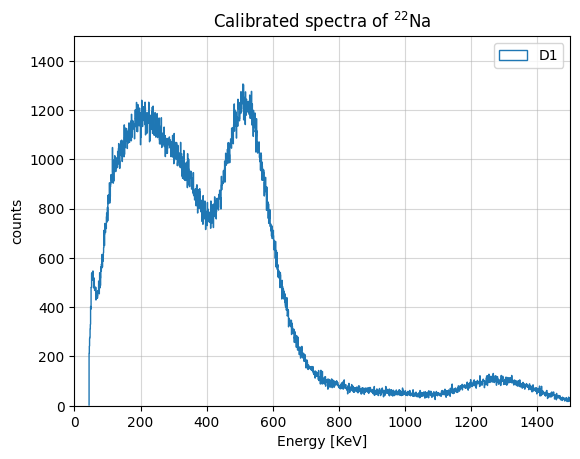

In [143]:
d1_calib = d1*calibrazioneD1[0]+calibrazioneD1[1]
plt.hist(d1_calib, bins=int(d1.max()), histtype='step', label='D1')
plt.title(r'Calibrated spectra of $^{22}$Na')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 1500)
plt.xlim(0, 1500)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

# samples

In [144]:
l = 250 #mm
h = 15 #mm
g = 5 #mm
s = np.array([3*g+5/2*h, 2*g+3/2*h, g+1/2*h, -1/2*h, -g-3/2*h, -2*g-5/2*h, -3*g-7/2*h])
theta_max = []
theta_min = []
for i in range(7):
    theta_max.append(np.arctan((s[i]+h)/l))
    theta_min.append(np.arctan(s[i]/l))
theta_max = np.array(theta_max)
theta_min = np.array(theta_min)
x0 = 5 #mm
x_eff = x0/(2*(theta_max-theta_min))*(np.log((1+np.sin(theta_max))/(1-np.sin(theta_max)))-np.log((1+np.sin(theta_min))/(1-np.sin(theta_min))))

## HOME

In [145]:
home_d1 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH0@DT5720B_781_group23_home_30min.root')
home_d2 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH1@DT5720B_781_group23_home_30min.root')
home_d3 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH2@DT5720B_781_group23_home_30min.root')
home_d4 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH3@DT5720B_781_group23_home_30min.root')
home_d5 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH0@DT5720B_467_group23_home_30min.root')
home_d6 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH1@DT5720B_467_group23_home_30min.root')
home_d7 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH2@DT5720B_467_group23_home_30min.root')
home_d8 = uproot.open('data_imaging\\group23_home_30min\\RAW\\DataR_CH3@DT5720B_467_group23_home_30min.root')

In [146]:
hm_d1 = np.asarray(home_d1['Data_R;1']['Energy'].array())
hm_d1_calib = hm_d1 * calibrazioneD1[0] + calibrazioneD1[1]
hm_d1_def = hm_d1_calib[hm_d1_calib != 0]

hm_d2 = np.asarray(home_d2['Data_R;1']['Energy'].array())
hm_d2_calib = hm_d2 * calibrazioneD2[0] + calibrazioneD2[1]
hm_d2_def = hm_d2_calib[hm_d2_calib != 0]

hm_d3 = np.asarray(home_d3['Data_R;1']['Energy'].array())
hm_d3_calib = hm_d3 * calibrazioneD3[0] + calibrazioneD3[1]
hm_d3_def = hm_d3_calib[hm_d3_calib != 0]

hm_d4 = np.asarray(home_d4['Data_R;1']['Energy'].array())
hm_d4_calib = hm_d4 * calibrazioneD4[0] + calibrazioneD4[1]
hm_d4_def = hm_d4_calib[hm_d4_calib != 0]

hm_d5 = np.asarray(home_d5['Data_R;1']['Energy'].array())
hm_d5_calib = hm_d5 * calibrazioneD5[0] + calibrazioneD5[1]
hm_d5_def = hm_d5_calib[hm_d5_calib != 0]

hm_d6 = np.asarray(home_d6['Data_R;1']['Energy'].array())
hm_d6_calib = hm_d6 * calibrazioneD6[0] + calibrazioneD6[1]
hm_d6_def = hm_d6_calib[hm_d6_calib != 0]

hm_d7 = np.asarray(home_d7['Data_R;1']['Energy'].array())
hm_d7_calib = hm_d7 * calibrazioneD7[0] + calibrazioneD7[1]
hm_d7_def = hm_d7_calib[hm_d7_calib != 0]

hm_d8 = np.asarray(home_d8['Data_R;1']['Energy'].array())
hm_d8_calib = hm_d8 * calibrazioneD8[0] + calibrazioneD8[1]
hm_d8_def = hm_d8_calib[hm_d8_calib != 0]


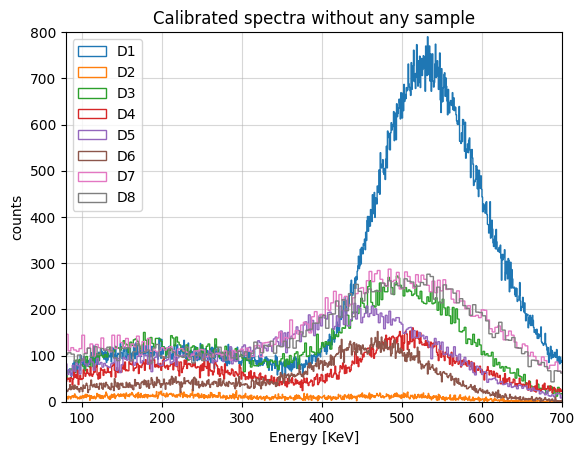

In [165]:
plt.hist(hm_d1_def, bins=int(hm_d1.max()), histtype='step', label='D1')
plt.hist(hm_d2_def, bins=int(hm_d2.max()), histtype='step', label='D2')
plt.hist(hm_d3_def, bins=int(hm_d3.max()), histtype='step', label='D3')
plt.hist(hm_d4_def, bins=int(hm_d4.max()), histtype='step', label='D4')
plt.hist(hm_d5_def, bins=int(hm_d5.max()), histtype='step', label='D5')
plt.hist(hm_d6_def, bins=int(hm_d6.max()), histtype='step', label='D6')
plt.hist(hm_d7_def, bins=int(hm_d7.max()), histtype='step', label='D7')
plt.hist(hm_d8_def, bins=int(hm_d8.max()), histtype='step', label='D8')
plt.title(r'Calibrated spectra without any sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 800)
plt.xlim(80, 700)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [148]:
fit_hm_d1 = bbb.normal(hm_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(hm_d1_def.max()/10), n=2, plot='no')
fit_hm_d2 = bbb.normal(hm_d2_def, xmin=400, xmax=600, x1=0, x2=1000, b=int(hm_d2_def.max()/10), n=2, plot='no')
fit_hm_d3 = bbb.normal(hm_d3_def, xmin=370, xmax=650, x1=0, x2=1000, b=int(hm_d3_def.max()/10), n=2, plot='no')
fit_hm_d4 = bbb.normal(hm_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(hm_d4_def.max()/10), n=2, plot='no')
fit_hm_d5 = bbb.normal(hm_d5_def, xmin=300, xmax=600, x1=0, x2=1000, b=int(hm_d5_def.max()/10), n=2, plot='no')
fit_hm_d6 = bbb.normal(hm_d6_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(hm_d6_def.max()/10), n=2, plot='no')
fit_hm_d7 = bbb.normal(hm_d7_def, xmin=380, xmax=650, x1=0, x2=1000, b=int(hm_d7_def.max()/10), n=2, plot='no')
fit_hm_d8 = bbb.normal(hm_d8_def, xmin=350, xmax=680, x1=0, x2=1000, b=int(hm_d8_def.max()/10), n=2, plot='no')

#integrals dal det2 al det6
hm_int = np.array([fit_hm_d2[5][0], fit_hm_d3[5][0], fit_hm_d4[5][0], fit_hm_d5[5][0], fit_hm_d6[5][0], fit_hm_d7[5][0], fit_hm_d8[5][0]])
hm_int_err = np.array([fit_hm_d2[5][1], fit_hm_d3[5][1], fit_hm_d4[5][1], fit_hm_d5[5][1], fit_hm_d6[5][1], fit_hm_d7[5][1], fit_hm_d8[5][1]])

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 1612621.0065103008 ± 20039.73710071498
Media = 534.7886158739352 ± 0.9471695547635939
Sigma = 68.54831610044945 ± 1.0424603162985209
Chi-quadro = 530.9038288623824
Chi-quadro ridotto = 22.120992869265933
Integrale dell'istogramma nel range [397.6919836730363, 671.8852480748342] = 157011 ± 396
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 41630.99035785379 ± 1788.9009217306852
Media = 482.8124325119869 ± 3.0666340557442484
Sigma = 84.32704768872586 ± 4.631234016107298
Chi-quadro = 20.65011634940071
Chi-quadro ridotto = 1.214712726435336
Integrale dell'istogramma nel range [314.1583371345352, 651.4665278894386] = 4629 ± 68
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 242423.85700167003 ± 7042.565848576224
Media = 497.10987167269326 ± 2.5792018558076304
Sigma = 83.9649609834854 ± 3.109109067541866
Chi-quadro = 252.93307697543435
Chi-qua

## PIOMBO

In [149]:
piombo_d1 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH0@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d2 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH1@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d3 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH2@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d4 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH3@DT5720B_781_group23_30min_lead_21000+22000+22000forward.root')
piombo_d5 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH0@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
piombo_d6 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH1@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
piombo_d7 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH2@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')
piombo_d8 = uproot.open('data_imaging\\group23_30min_lead_21000+22000+22000forward\\RAW\\DataR_CH3@DT5720B_467_group23_30min_lead_21000+22000+22000forward.root')

In [150]:
pb_d1 = np.asarray(piombo_d1['Data_R;1']['Energy'].array())
pb_d1_calib = pb_d1*calibrazioneD1[0]+calibrazioneD1[1]
pb_d1_def = pb_d1_calib[pb_d1_calib != 0]

pb_d2 = np.asarray(piombo_d2['Data_R;1']['Energy'].array())
pb_d2_calib = pb_d2*calibrazioneD2[0]+calibrazioneD2[1]
pb_d2_def = pb_d2_calib[pb_d2_calib != 0]

pb_d3 = np.asarray(piombo_d3['Data_R;1']['Energy'].array())
pb_d3_calib = pb_d3 * calibrazioneD3[0] + calibrazioneD3[1]
pb_d3_def = pb_d3_calib[pb_d3_calib != 0]

pb_d4 = np.asarray(piombo_d4['Data_R;1']['Energy'].array())
pb_d4_calib = pb_d4 * calibrazioneD4[0] + calibrazioneD4[1]
pb_d4_def = pb_d4_calib[pb_d4_calib != 0]

pb_d5 = np.asarray(piombo_d5['Data_R;1']['Energy'].array())
pb_d5_calib = pb_d5 * calibrazioneD5[0] + calibrazioneD5[1]
pb_d5_def = pb_d5_calib[pb_d5_calib != 0]

pb_d6 = np.asarray(piombo_d6['Data_R;1']['Energy'].array())
pb_d6_calib = pb_d6 * calibrazioneD6[0] + calibrazioneD6[1]
pb_d6_def = pb_d6_calib[pb_d6_calib != 0]

pb_d7 = np.asarray(piombo_d7['Data_R;1']['Energy'].array())
pb_d7_calib = pb_d7 * calibrazioneD7[0] + calibrazioneD7[1]
pb_d7_def = pb_d7_calib[pb_d7_calib != 0]

pb_d8 = np.asarray(piombo_d8['Data_R;1']['Energy'].array())
pb_d8_calib = pb_d8 * calibrazioneD8[0] + calibrazioneD8[1]
pb_d8_def = pb_d8_calib[pb_d8_calib != 0]

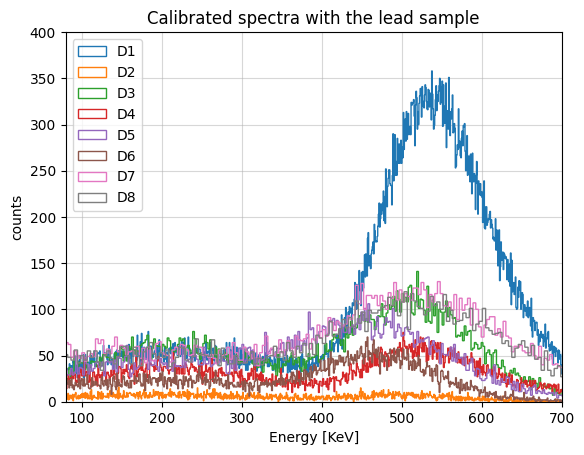

In [151]:
plt.hist(pb_d1_def, bins=int(pb_d1.max()), histtype='step', label='D1')
plt.hist(pb_d2_def, bins=int(pb_d2.max()), histtype='step', label='D2')
plt.hist(pb_d3_def, bins=int(pb_d3.max()), histtype='step', label='D3')
plt.hist(pb_d4_def, bins=int(pb_d4.max()), histtype='step', label='D4')
plt.hist(pb_d5_def, bins=int(pb_d5.max()), histtype='step', label='D5')
plt.hist(pb_d6_def, bins=int(pb_d6.max()), histtype='step', label='D6')
plt.hist(pb_d7_def, bins=int(pb_d7.max()), histtype='step', label='D7')
plt.hist(pb_d8_def, bins=int(pb_d8.max()), histtype='step', label='D8')
plt.title(r'Calibrated spectra with the lead sample')
plt.xlabel('Energy [KeV]')
plt.ylabel('counts')
plt.ylim(0, 400)
plt.xlim(80, 700)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [152]:
fit_pb_d1 = bbb.normal(pb_d1_def, xmin=400, xmax=670, x1=0, x2=1000, b=int(pb_d1_def.max()/10), n=2, plot='no')
fit_pb_d2 = bbb.normal(pb_d2_def, xmin=380, xmax=600, x1=0, x2=1000, b=int(pb_d2_def.max()/10), n=2, plot='no')
fit_pb_d3 = bbb.normal(pb_d3_def, xmin=370, xmax=650, x1=0, x2=1000, b=int(pb_d3_def.max()/10), n=2, plot='no')
fit_pb_d4 = bbb.normal(pb_d4_def, xmin=400, xmax=650, x1=0, x2=1000, b=int(pb_d4_def.max()/10), n=2, plot='no')
fit_pb_d5 = bbb.normal(pb_d5_def, xmin=300, xmax=600, x1=0, x2=1000, b=int(pb_d5_def.max()/10), n=2, plot='no')
fit_pb_d6 = bbb.normal(pb_d6_def, xmin=350, xmax=600, x1=0, x2=1000, b=int(pb_d6_def.max()/10), n=2, plot='no')
fit_pb_d7 = bbb.normal(pb_d7_def, xmin=380, xmax=650, x1=0, x2=1000, b=int(pb_d7_def.max()/10), n=2, plot='no')
fit_pb_d8 = bbb.normal(pb_d8_def, xmin=350, xmax=680, x1=0, x2=1000, b=int(pb_d8_def.max()/10), n=2, plot='no')

#integrals dal det2 al det6
pb_int = np.array([fit_pb_d2[5][0], fit_pb_d3[5][0], fit_pb_d4[5][0], fit_pb_d5[5][0], fit_pb_d6[5][0], fit_pb_d7[5][0], fit_pb_d8[5][0]])
pb_int_err = np.array([fit_pb_d2[5][1], fit_pb_d3[5][1], fit_pb_d4[5][1], fit_pb_d5[5][1], fit_pb_d6[5][1], fit_pb_d7[5][1], fit_pb_d8[5][1]])

Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 737353.6534332427 ± 9001.702040544018
Media = 540.7054064306845 ± 0.9369330363576598
Sigma = 69.21224419123274 ± 1.037630952494925
Chi-quadro = 208.9169026182588
Chi-quadro ridotto = 8.70487094242745
Integrale dell'istogramma nel range [402.28091804821906, 679.12989481315] = 71615 ± 267
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 23449.92899420721 ± 1078.626918928082
Media = 487.70849646835467 ± 3.431935251369109
Sigma = 82.75213625704949 ± 5.010787956618215
Chi-quadro = 26.06781686700461
Chi-quadro ridotto = 1.3719903614212952
Integrale dell'istogramma nel range [322.20422395425567, 653.2127689824537] = 2526 ± 50
Parametri ottimizzati:
-----------------------------------------------
Ampiezza = 108946.06697312849 ± 4110.58404457172
Media = 503.57496065973834 ± 3.391883357915347
Sigma = 86.20868200812997 ± 4.17436188040077
Chi-quadro = 180.6814453633857
Chi-quadro rido

In [153]:
hm_int.shape

(7,)

In [171]:
#CALCOLO COEFFICIENTE ATTENUAZIONE PIOMBO
rho_piombo = 0.01134 #g/mm^3
mu_piombo = -(np.log(pb_int/hm_int))/(x_eff*rho_piombo) #mm^2/g
mu_piombo_err = 1/(x_eff*rho_piombo) * np.sqrt((pb_int_err/pb_int)**2 + (hm_int_err/hm_int)**2)

mu_atteso = 16.13 #mm^2/g trovato sul sito: https://physics.nist.gov/cgi-bin/Xcom/xcom3_1

piombo_compat = np.abs(mu_piombo-mu_atteso)/mu_piombo_err

for i in range(len(mu_piombo)):
    print(f'mu{i+2} = {mu_piombo[i]} ± {mu_piombo_err[i]} mm⁻¹ \t compatibilità: {piombo_compat[i]}')



mu2 = 10.386559865014418 ± 0.422689766617937 mm⁻¹ 	 compatibilità: 13.587838146498095
mu3 = 13.769045637532653 ± 0.2013908912751213 mm⁻¹ 	 compatibilità: 11.723243030103246
mu4 = 13.829544410612966 ± 0.20522045455213744 mm⁻¹ 	 compatibilità: 11.209679826542772
mu5 = 13.796528401262057 ± 0.19823006594051876 mm⁻¹ 	 compatibilità: 11.771532172309964
mu6 = 14.334263916800293 ± 0.20840234439036923 mm⁻¹ 	 compatibilità: 8.616678897987924
mu7 = 14.198854210097092 ± 0.20615944175463416 mm⁻¹ 	 compatibilità: 9.367243981002375
mu8 = 14.291738270008995 ± 0.22774702078906348 mm⁻¹ 	 compatibilità: 8.071507252310358
